<a href="https://colab.research.google.com/github/BingHung/AI/blob/master/%5B02162019_2%5D_Keras_MNIST_Hand_Writing_Digit_Demo_MLPv2_1000neurons.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Preprocess

In [1]:
import numpy as np
import pandas as pd
from keras.utils import np_utils
np.random.seed(10)

Using TensorFlow backend.


In [2]:
# Import tensorflow's MNIST data handle
'''
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("official/mnist/dataset.py", one_hot=True)
'''

from keras.datasets import mnist
(x_train_image,y_train_label),(x_test_image,y_test_label) = mnist.load_data()


print('train data=', len(x_train_image))
print('test_data=', len(x_test_image))

print('x_train_image=', x_train_image.shape)
print('y_train_label=', y_train_label.shape)


print('x_test_image=', x_test_image.shape)
print('y_test_label=', y_test_label.shape)

train data= 60000
test_data= 10000
x_train_image= (60000, 28, 28)
y_train_label= (60000,)
x_test_image= (10000, 28, 28)
y_test_label= (10000,)


In [0]:
import matplotlib.pyplot as plt
def plot_image(image):
  fig = plt.gcf()
  fig.set_size_inches(2,2)
  plt.imshow(image, cmap="binary")
  plt.show()

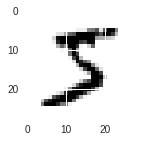

In [4]:
plot_image(x_train_image[0])

In [5]:
y_train_label[0]

5

In [0]:
def plot_images_labels_prediction(images,labels,prediction,idx,num=10):
  fig = plt.gcf()
  fig.set_size_inches(12,14)
  if num>25: num=25
  for i in range(0,num):
    ax=plt.subplot(5,5,1+i)
    ax.imshow(images[idx], cmap='binary')
    title ='label=' +str(labels[idx])
    if len(prediction)>0:
      title += 'prediction='+str(prediction[idx])
    ax.set_title(title,fontsize=10)
    ax.set_xticks([]);ax.set_yticks([])
    idx+=1
  plt.show()

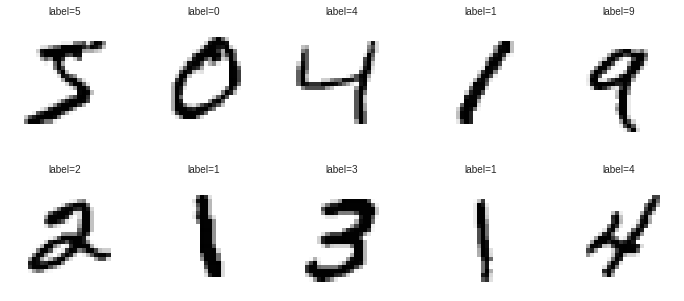

In [7]:
plot_images_labels_prediction(x_train_image,y_train_label,[],0,10)

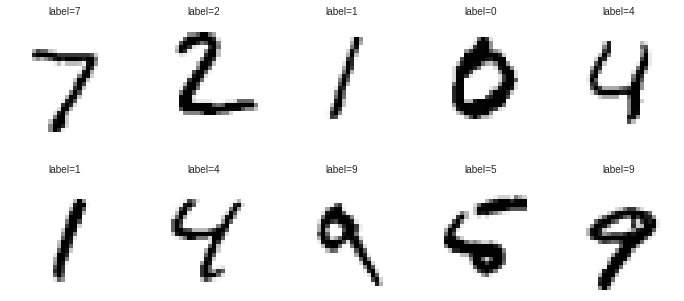

In [8]:
plot_images_labels_prediction(x_test_image,y_test_label,[],0,10)

In [9]:
x_Train = x_train_image.reshape(60000,784).astype('float32')
x_Test = x_test_image.reshape(10000,784).astype('float32')

print('x_Train:',x_Train.shape)
print('y_test:',x_Test.shape)

x_Train: (60000, 784)
y_test: (10000, 784)


In [10]:
x_Train[0]

array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   

In [11]:
x_Train_normalize = x_Train/255
x_Test_normalize = x_Test/255

x_Train_normalize[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [12]:
y_train_label[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [0]:
y_TrainOneHot=np_utils.to_categorical(y_train_label)
y_TestOneHot=np_utils.to_categorical(y_test_label)

In [14]:
y_TrainOneHot[:5]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

# Model Construction

In [0]:
from keras.models import Sequential
from keras.layers import Dense

In [0]:
model = Sequential()

In [0]:
# 256 neurons to 1000 
model.add(Dense(units=1000,input_dim=784,kernel_initializer='normal',activation='relu'))

In [0]:
model.add(Dense(units=10,kernel_initializer='normal',activation='softmax'))

In [19]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1000)              785000    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                10010     
Total params: 795,010
Trainable params: 795,010
Non-trainable params: 0
_________________________________________________________________
None


In [0]:
# 784*256+256=200960
# 256*10+10=2570
# 200960+2570=203530

# Training

In [0]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [22]:
train_history=model.fit(x=x_Train_normalize,y=y_TrainOneHot,validation_split=0.2,epochs=10,batch_size=200,verbose=2)

Instructions for updating:
Use tf.cast instead.
Train on 48000 samples, validate on 12000 samples
Epoch 1/10
 - 6s - loss: 0.2984 - acc: 0.9142 - val_loss: 0.1532 - val_acc: 0.9568
Epoch 2/10
 - 6s - loss: 0.1182 - acc: 0.9659 - val_loss: 0.1076 - val_acc: 0.9678
Epoch 3/10
 - 6s - loss: 0.0758 - acc: 0.9783 - val_loss: 0.0921 - val_acc: 0.9728
Epoch 4/10
 - 6s - loss: 0.0519 - acc: 0.9851 - val_loss: 0.0879 - val_acc: 0.9733
Epoch 5/10
 - 6s - loss: 0.0361 - acc: 0.9900 - val_loss: 0.0751 - val_acc: 0.9755
Epoch 6/10
 - 6s - loss: 0.0257 - acc: 0.9936 - val_loss: 0.0736 - val_acc: 0.9775
Epoch 7/10
 - 6s - loss: 0.0186 - acc: 0.9959 - val_loss: 0.0726 - val_acc: 0.9792
Epoch 8/10
 - 6s - loss: 0.0133 - acc: 0.9972 - val_loss: 0.0723 - val_acc: 0.9786
Epoch 9/10
 - 6s - loss: 0.0090 - acc: 0.9987 - val_loss: 0.0714 - val_acc: 0.9803
Epoch 10/10
 - 6s - loss: 0.0066 - acc: 0.9990 - val_loss: 0.0715 - val_acc: 0.9789


In [0]:
# validation_split = 0.2 , 60000*0.8=48000, 60000x0.2=12000
# epoches = 10, batch_size =200
# 48000 / 200 = 240 

def show_train_history(train_history,train,validation):
  plt.plot(train_history.history[train])
  plt.plot(train_history.history[validation])
  plt.title('Train History')
  plt.ylabel(train)
  plt.xlabel('Epoch')
  plt.legend(['train','validation'],loc='upper left')
  plt.show()


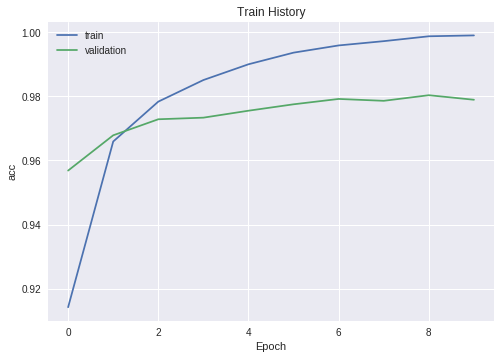

In [24]:
show_train_history(train_history,'acc','val_acc')

In [0]:
# if the acc of train is growing but the increment of the validation is getting smaller and smaller , it might comes to overfitting !

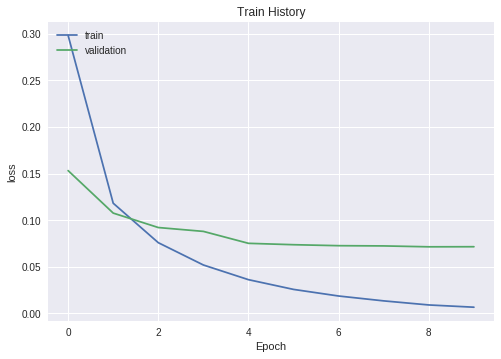

In [26]:
show_train_history(train_history,'loss','val_loss')

In [27]:
# Evaluating the acc of the model
scores = model.evaluate(x_Test_normalize,y_TestOneHot)
print()
print('accuracy=',scores[1])

10000/10000 [==============================] - 1s 75us/step

accuracy= 0.9793


# Prediction

In [28]:
prediction=model.predict_classes(x_Test)
print(prediction)

[7 2 1 ... 4 5 6]


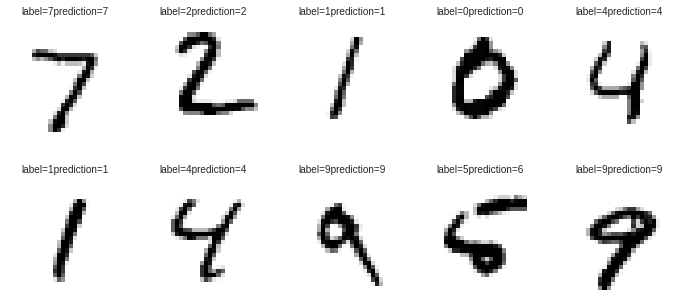

In [29]:
plot_images_labels_prediction(x_test_image,y_test_label,prediction,idx=0)

In [30]:
pd.crosstab(y_test_label,prediction,rownames=['label'],colnames=['predict'])

predict,0,1,2,3,4,5,6,7,8,9
label,,,,,,,,,,
0,971,1,2,1,1,0,1,1,2,0
1,0,1127,4,0,0,1,1,1,1,0
2,3,1,1004,7,3,0,3,8,3,0
3,1,0,1,997,0,2,0,4,3,2
4,1,2,4,1,965,0,2,1,1,5
5,2,0,0,17,1,856,6,2,5,3
6,4,3,1,1,4,4,941,0,0,0
7,1,4,8,3,1,0,0,1006,3,2
8,2,0,4,9,4,0,1,3,949,2


In [31]:
df = pd.DataFrame({'label':y_test_label,'predict':prediction})
df[:2]

,label,predict
0,7,7
1,2,2


In [32]:
df[(df.label==5)&(df.predict==3)]

,label,predict
340,5,3
1003,5,3
1393,5,3
1670,5,3
2035,5,3
2162,5,3
2597,5,3
2810,5,3
3117,5,3
3902,5,3


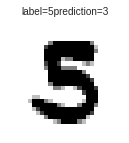

In [33]:
plot_images_labels_prediction(x_test_image,y_test_label,prediction,idx=1003,num=1)